In this notebook we compare $KKL_{\alpha}(\hat{p}||\hat{q})$ for large $n$ and $m$, with $KL(p||q)$ when $\alpha$ goes to 0.

In [61]:
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt
import time


import kkl.kernels as kl
import kkl.gradient_descent as gd
import kkl.generate_y as gy
import kkl.divergences as dv

import cProfile

Evolution with alpha 

In [62]:
sigma = 5
k = lambda x,y :  kl.k_gauss(x,y,sigma)
dk = lambda x,y : kl.dk_gauss(x, y, sigma)

#parameters of p and q
mux = np.array([2,2])
Lx = np.random.randn(2,2)
Sigmax = Lx @ Lx.transpose()
muy = np.array([0,0])
Ly =  np.random.randn(2,2)
Sigmay = np.identity(2)#Ly @ Ly.transpose() 

n = 1000
m = 1000
x = scs.multivariate_normal.rvs(mux,Sigmax,n)
y = scs.multivariate_normal.rvs(muy,Sigmay,m)

Ky = 1/m * k(y,y) 
Ly,V = np.linalg.eig(Ky)
V = V.transpose()
Ly = np.real(Ly)
Packy = [Ky,Ly,V]



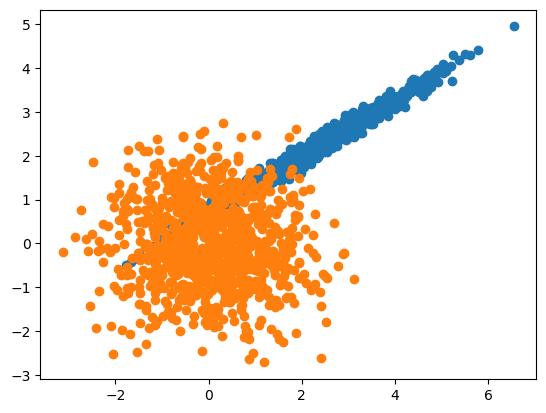

In [63]:
plt.scatter(x[:,0],x[:,1])
plt.scatter(y[:,0],y[:,1])

8.0
2.583483168760959


Text(0.5, 0, '1-\\alpha')

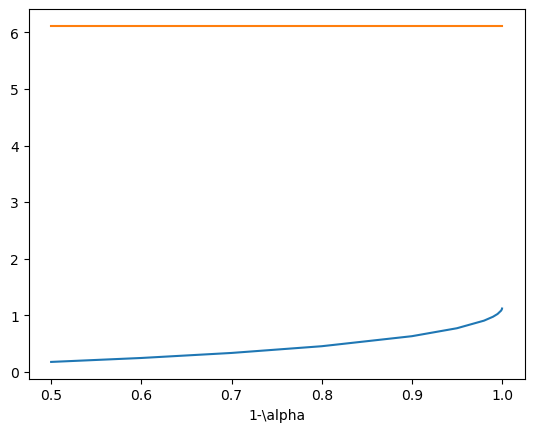

In [64]:
Alpha = [0.5,0.4,0.3,0.2,0.1,0.05,0.02,0.01,0.005,0.001,1e-4,1e-5,1e-6]
KKL_alpha = []
for alpha in Alpha:
    J = lambda x,y : dv.KKL(x, y,k,Packy,alpha)
    KKL_alpha.append(J(x,y))

KL = dv.KL_gauss(mux,Sigmax,muy,Sigmay)
plt.plot(1-np.array(Alpha),KKL_alpha)
plt.plot(1-np.array(Alpha), [KL for i in range(len(Alpha))])
plt.xlabel(r"1-\alpha")

$\mu_x$ convergent vers $\mu_y$

In [73]:
sigma = 5
k = lambda x,y :  kl.k_gauss(x,y,sigma)
dk = lambda x,y : kl.dk_gauss(x, y, sigma)


#parameters of p and q
mux = np.array([5,5])
Mux = np.array([1/k *mux for k in range(1,17)])
Lx = np.random.randn(2,2)
Sigmax = Lx @ Lx.transpose()
muy = np.array([0,0])
Ly =  np.random.randn(2,2)
Sigmay = np.identity(2)#Ly @ Ly.transpose() 

n = 100
m = 100

y = scs.multivariate_normal.rvs(muy,Sigmay,m)

Ky = 1/m * k(y,y) 
Ly,V = np.linalg.eig(Ky)
V = V.transpose()
Ly = np.real(Ly)
Packy = [Ky,Ly,V]


50.0
3.744225778293296


C:\Users\cleme\AppData\Local\Temp\ipykernel_8704\3175320802.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  KKL_alpha[a][i] = J(x)


12.5
3.744225778293296
5.5555555555555545
3.744225778293296
3.125
3.744225778293296
2.0
3.744225778293296
1.3888888888888886
3.744225778293296
1.020408163265306
3.744225778293296
0.78125
3.744225778293296
0.617283950617284
3.744225778293296
0.5
3.744225778293296
0.41322314049586784
3.744225778293296
0.34722222222222215
3.744225778293296
0.2958579881656805
3.744225778293296
0.2551020408163265
3.744225778293296
0.2222222222222222
3.744225778293296
0.1953125
3.744225778293296


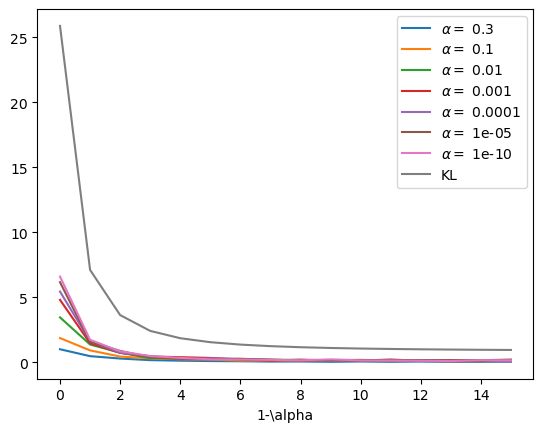

In [79]:
Alpha = [0.3,0.1,0.01,0.001,1e-4,1e-5,1e-10]
KKL_alpha = np.zeros((len(Alpha),len(Mux)))
KL = []
for i in range(len(Mux)):
    KL.append(dv.KL_gauss(Mux[i],Sigmax,muy,Sigmay))
    for a in range (len(Alpha)):
        J = lambda x : dv.KKL(x,y,k,Packy,Alpha[a])
        x = scs.multivariate_normal.rvs(Mux[i],Sigmax,n)
        KKL_alpha[a][i] = J(x)
    

for j in range(len(Alpha)):
    plt.plot(KKL_alpha[j],label = r"$\alpha =$ " + str(Alpha[j]))

plt.plot(KL,label = "KL")
plt.xlabel(r"1-\alpha")
plt.legend()

0
1
2
3
4
5
6
7
8
9
